In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
train = pd.read_csv(r"C:\Users\Vaibhavi\Desktop\exoTrain.csv")
test = pd.read_csv(r"C:\Users\Vaibhavi\Desktop\exoTest.csv")

In [2]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
len(train)

5087

In [4]:
len(test)

570

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [6]:
# Replacing Label values (2 with 1 and 1 with 0)
replacement={2:1, 1:0}
train.LABEL = [replacement[item] for item in train.LABEL]
test.LABEL = [replacement[item] for item in test.LABEL]

In [7]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


C:\Users\Vaibhavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LABEL', ylabel='count'>

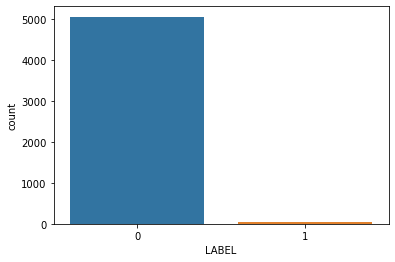

In [8]:
sns.countplot(train['LABEL']) 

In [9]:
# It can be seen from the above plot that our dataset is highly imbalanced.

In [10]:
# Separating LABEL column from 'train' and 'test' dataframes
x_train = train.drop('LABEL', axis=1)
y_train = train['LABEL']
x_test = test.drop('LABEL', axis=1)
y_test = test['LABEL']

DATA NORMALIZATION

In [11]:
def Normalize(Z):
    for key in Z:
        mean = (Z[key].sum(axis=0))/len(Z)
        Z[key] = (Z[key]-mean)/(max(Z[key])-min(Z[key]))
    return Z  

In [12]:
x_train = Normalize(x_train)
x_test = Normalize(x_test)

In [13]:
x_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,-0.000030,-0.000025,-0.000072,-0.000106,-0.000101,-0.000129,-0.000118,-0.000106,-0.000117,-0.000203,...,-0.000203,-0.000223,-0.000235,-0.000194,-0.000169,-0.000137,0.000502,0.000639,0.000490,0.000305
1,-0.000110,-0.000092,-0.000117,-0.000113,-0.000122,-0.000104,-0.000095,-0.000100,-0.000119,-0.000144,...,-0.000167,-0.000197,-0.000214,-0.000208,-0.000183,-0.000159,0.000454,0.000581,0.000502,0.000375
2,0.000233,0.000230,0.000209,0.000197,0.000155,0.000152,0.000163,0.000186,0.000180,0.000231,...,-0.000200,-0.000180,-0.000200,-0.000209,-0.000188,-0.000158,0.000454,0.000544,0.000407,0.000239
3,0.000109,0.000124,0.000089,0.000082,0.000084,0.000079,0.000096,0.000099,0.000109,0.000123,...,-0.000163,-0.000186,-0.000205,-0.000193,-0.000177,-0.000162,0.000457,0.000556,0.000465,0.000368
4,-0.000751,-0.000702,-0.000722,-0.000723,-0.000628,-0.000561,-0.000522,-0.000570,-0.000639,-0.000748,...,-0.000448,-0.000334,-0.000327,-0.000297,-0.000299,-0.000266,0.000089,0.000169,0.000031,-0.000246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-0.000142,-0.000125,-0.000129,-0.000147,-0.000116,-0.000102,-0.000090,-0.000082,-0.000088,-0.000103,...,-0.000099,-0.000130,-0.000157,-0.000159,-0.000141,-0.000122,0.000442,0.000557,0.000488,0.000374
5083,0.000507,0.000431,0.000434,0.000402,0.000310,0.000223,0.000224,0.000173,0.000213,0.000164,...,-0.000178,-0.000186,-0.000227,-0.000211,-0.000222,-0.000192,0.000501,0.000680,0.000434,0.000393
5084,0.000077,0.000084,0.000065,0.000047,0.000064,0.000056,0.000064,0.000070,0.000066,0.000066,...,-0.000178,-0.000205,-0.000219,-0.000193,-0.000178,-0.000160,0.000527,0.000668,0.000572,0.000445
5085,-0.000084,-0.000072,-0.000086,-0.000092,-0.000080,-0.000070,-0.000053,-0.000057,-0.000069,-0.000091,...,-0.000161,-0.000186,-0.000206,-0.000202,-0.000185,-0.000159,0.000461,0.000559,0.000477,0.000349


SOLVING THE PROBLEM OF IMBALANCE IN DATASET USING SMOTE (Synthetic Minority Oversampling Technique)

In [14]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

C:\Users\Vaibhavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LABEL', ylabel='count'>

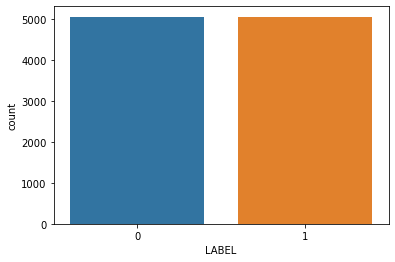

In [15]:
sns.countplot(y_train)

In [16]:
# Now there are equal number of training examples of both the classes
x_train.shape

(10100, 3197)

TRAINING AND TESTING

SVM

In [17]:
from sklearn.svm import SVC
SVM_model=SVC()
SVM_model.fit(x_train, y_train)

SVC()

In [18]:
predictions = SVM_model.predict(x_test)
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.99      0.92      0.96       565\n           1       0.02      0.20      0.04         5\n\n    accuracy                           0.92       570\n   macro avg       0.51      0.56      0.50       570\nweighted avg       0.98      0.92      0.95       570\n'

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[522,  43],
       [  4,   1]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9175438596491228